In [1]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm
import numpy as np
from scipy import stats

import os

C:\Program Files\Anaconda3\envs\carmi_thesis_3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
import importlib
import plot, loaders
plot = importlib.reload(plot)
loaders = importlib.reload(loaders)

In [3]:
PLOT_THICKENS = True
if PLOT_THICKENS:
    # sns.plotting_context("talk")
    CUSTOM_SNS_RC = {'xtick.labelsize': 13.5, 'ytick.labelsize': 13.5, 'legend.fontsize': 13.0, 
                                                 'axes.labelsize': 14, 'axes.titlesize': 15}
    # sns.set_context("paper", font_scale=1.4, rc=CUSTOM_SNS_RC)
    sns.set_context("talk", font_scale=1, rc=CUSTOM_SNS_RC)

In [4]:
PGS_DIR = os.path.join("data", "pgs")
SAVE_FIG_DIR = "figure4"

DATA

In [5]:
height_data = loaders.load_longevity_data(add_const_col=True, convert_to_cm=True)
height_data.head()
height_model_covar = sm.OLS(endog=height_data["Height"], exog=height_data[["const", "Gender", "Age"]]).fit()
print(height_model_covar.rsquared)
height = height_model_covar.resid.rename("height")
height.head()

0.6083835435619124


FID  IID
2    427    -5.170359
     448    -0.060077
11   615    -5.118246
     616    -5.087965
24   887    10.152035
Name: height, dtype: float64

In [6]:
iq_data = loaders.load_aspis_data(add_const_col=False, convert_to_iq=True)
iq = iq_data["IQ"]
iq.head()

FID   IID 
2105  2105    106.318305
3217  3217     87.007700
5088  5088    106.098128
2266  2266     94.680506
2007  2007    100.865749
Name: IQ, dtype: float64

Plot prediction interval

In [7]:
def get_plot_data(p_var_exp, pheno, ci=0.95):
    y_std = pheno.std()
    alpha = stats.norm.isf((1-ci) / 2)
    if not np.all((p_var_exp.min() >= 0) & (p_var_exp.max() <= 1)):
        p_var_exp = p_var_exp / 100  # to fractions
    pred_interval = alpha * y_std * np.sqrt(1 - p_var_exp)
    return pred_interval

In [8]:
def single_plot(pheno, ax):
    # p_var_exp = np.arange(0, 101)
    if pheno.name.lower() == "height":
        p_var_exp = np.arange(20, 81)
#         p_var_exp = np.arange(30, 81)
        title = "Height"
        units = "cm"
    elif pheno.name.lower() == "iq":
        p_var_exp = np.arange(0, 71)
        title = "IQ"
        units = "IQ"
    else:
        return None
    pred_interval = get_plot_data(p_var_exp, pheno)
    ax.plot(p_var_exp, pred_interval, marker=".", color="C1")
    
    ax.annotate('Heritability',
                xy=(p_var_exp[-1], pred_interval[-1]), xycoords='data',
                xytext=(p_var_exp[-10], pred_interval[20]), textcoords='data',
                arrowprops=dict(facecolor='black', shrink=0.05, alpha=0.8),
                fontsize=15, horizontalalignment='right', va="bottom")
    
    ax.set_title(title)
    ax.set_ylabel("Prediction interval width [{}]".format(units))
    ax.set_xlabel("Total variance explained [%]")
    ax.tick_params(axis='both', which='major', pad=3)
    return ax

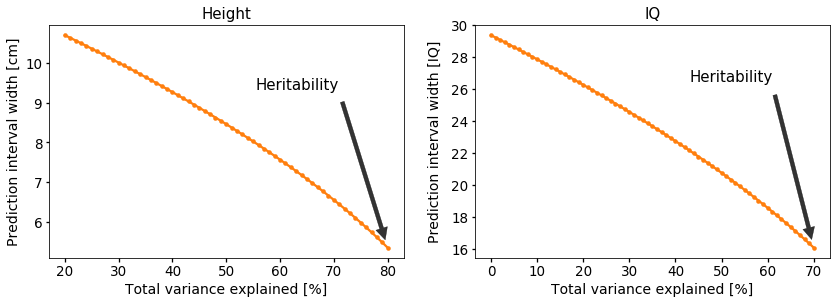

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(14, 4.3))
single_plot(height, axes[0])
single_plot(iq, axes[1])
axes[1].yaxis.labelpad = 9

In [127]:
plot.save_fig(fig, "prediction-interval_height-iq" + ("_thick" if PLOT_THICKENS else ""), SAVE_FIG_DIR)

In [138]:
def single_plot(pheno, ax):
    # p_var_exp = np.arange(0, 101)
    if pheno.name.lower() == "height":
#         p_var_exp = np.arange(20, 81)
        p_var_exp = np.arange(30, 81)
        title = "Height"
        units = "cm"
    elif pheno.name.lower() == "iq":
        p_var_exp = np.arange(0, 71)
        title = "IQ"
        units = "IQ"
    else:
        return None
    pred_interval = get_plot_data(p_var_exp, pheno)
    ax.plot(p_var_exp, pred_interval, marker=".", color="C1")
    
    ax.annotate('Heritability',
                xy=(p_var_exp[-1], pred_interval[-1]), xycoords='data',
                xytext=(p_var_exp[-1], pred_interval[20]), textcoords='data',
                arrowprops=dict(facecolor='black', shrink=0.05, alpha=0.8),
                fontsize=15, horizontalalignment='right', va="bottom")
    
    ax.set_title(title)
    ax.set_ylabel("Prediction interval half-width [{}]".format(units))
    ax.set_xlabel("Total variance explained [%]")
    ax.tick_params(axis='both', which='major', pad=3)
    return ax

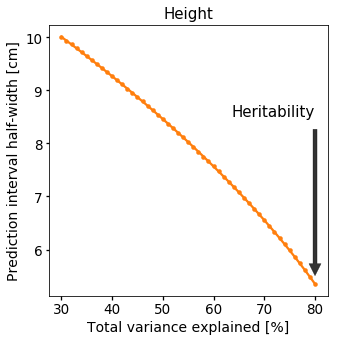

In [151]:
fig, ax = plt.subplots(figsize=(5, 5))
single_plot(height, ax);

In [152]:
plot.save_fig(fig, "prediction-interval_height" + ("_thick" if PLOT_THICKENS else ""), SAVE_FIG_DIR)

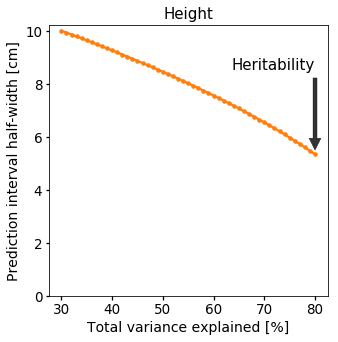

In [153]:
ax.set_ylim(0, ax.get_ylim()[1]);
fig

In [154]:
plot.save_fig(fig, "prediction-interval_height_full-ylim" + ("_thick" if PLOT_THICKENS else ""), SAVE_FIG_DIR)

In [120]:
def plot_height(pheno, ax):
    p_var_exp = np.arange(30, 81)
    
    pred_interval = get_plot_data(p_var_exp, pheno)
    ax.plot(p_var_exp, pred_interval, marker=".", color="C1")
    
    ax.annotate('Heritability',
                xy=(p_var_exp[-1], pred_interval[-1]), xycoords='data',
                xytext=(p_var_exp[-1], pred_interval[20]), textcoords='data',
                arrowprops=dict(facecolor='black', shrink=0.05, alpha=0.8),
                fontsize=15, horizontalalignment='right', va="bottom")
    
    ax.set_title("Height")
    ax.set_ylabel("Prediction interval half-width [cm]")
    ax.set_xlabel("Total variance explained [%]")
    ax.tick_params(axis='both', which='major', pad=3)
    ax.set_ylim(0, ax.get_ylim()[1])
    return ax

def plot_iq(pheno, ax, above=True):
    p_var_exp = np.arange(18, 81)
    
    pred_interval = get_plot_data(p_var_exp, pheno)
    ax.plot(p_var_exp, pred_interval, marker=".", color="C1")

    if above:
        ax.annotate('Heritability',
                    xy=(70, pred_interval[np.where(p_var_exp == 60)[0]] + 1.3), xycoords='data',
                    xytext=(70, 22), textcoords='data',
                    arrowprops=dict(arrowstyle='-[, widthB=3.8, lengthB=0.5, angleB=0', lw=2.7),
                    fontsize=15, horizontalalignment='center', va="bottom")
    else:
        ax.annotate('Heritability',
                    xy=(70, pred_interval[-1] - 1.2), xycoords='data',
                    xytext=(70, 4), textcoords='data',
                    arrowprops=dict(arrowstyle='-[, widthB=3.8, lengthB=0.5, angleB=0', lw=2.7),
                    fontsize=15, horizontalalignment='center', va="bottom")
    ax.set_title("IQ")
    ax.set_ylabel("Prediction interval half-width [IQ]")
    ax.set_xlabel("Total variance explained [%]")
    ax.tick_params(axis='both', which='major', pad=3)
    ax.set_ylim(0, ax.get_ylim()[1])
    return ax

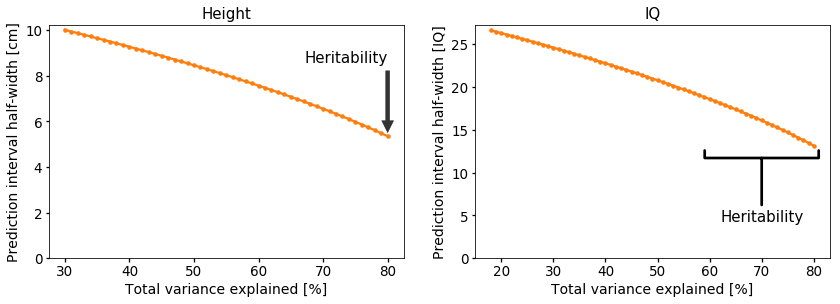

In [123]:
fig, axes = plt.subplots(1, 2, figsize=(14, 4.3))
plot_height(height, axes[0])
# plot_iq(iq, axes[1], above=True);
plot_iq(iq, axes[1], above=False);

In [124]:
# plot.save_fig(fig, "prediction-interval_height-iq_above" + ("_thick" if PLOT_THICKENS else ""), SAVE_FIG_DIR)
plot.save_fig(fig, "prediction-interval_height-iq_below" + ("_thick" if PLOT_THICKENS else ""), SAVE_FIG_DIR)